# Problem #1

<span style="color:orange"> good 100/100 </span>

## System 1

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
# Let's call the system S(). We have a vector 'a' and a vector 'b' defined as:
a = np.array([2, 4])
b = np.array([-1, -2])

In [3]:
# Note that a = -2b
assert np.array_equal(a, -2*b)

In [4]:
# We also know the outputs of the system S(a) and S(b)
S_a = np.array([-6, -6])
S_b = np.array([3, 3])

In [5]:
# Since a = -2b, then for the system to be linear, we must have that
# S(a) = -2S(b) by the principle of superposition. Let's check:
assert np.array_equal(S_a, -2*S_b)

Now let's find a matrix that could be associated with this system. 
We know by dimension rules that this must be a 2x2 matrix. Let's 
call it M:
             
            M =   [m_00, m_01]
                  [m_10, m_11]
                  
We know that Ma = [-6, -6]. So we have 2m_00 + 4m_01 = -6. We also know
that Mb = [3, 3], but this doesn't add any information because b is a
linear combination of a. So one possible solution is m_00 = -1 and 
m_01 = -1, but this is not unique because we have 2 variables and 1 
equality. We also have 2m_10 + 4m_11 = -6, which leads us to possible
values m_10 = -1, m_11 = -1. But these values are again not unique,
for the same reasoning. So we have
            
            M = [-1, -1]
                [-1, -1]
                
as a possible matrix for this system, but it is not unique (explained
above).

In [6]:
# Check that M works
M = np.array([[-1, -1], [-1, -1]])
assert np.array_equal(np.matmul(M, a), S_a)
assert np.array_equal(np.matmul(M, b), S_b)

## System 2

In [7]:
# Again we have 'a' and 'b'
a = 1
b = 2

In [8]:
# Note that b = 2a
assert b == 2*a

In [9]:
# Check whether S(b) = 2S(a)
S_a = np.array([1, 4])
S_b = np.array([2, 6])
assert np.array_equal(S_b, 2*S_a)

AssertionError: 

S(b) != 2S(a). So S() is not a linear system because it
does not follow the principle of superposition.

## System 3

In [10]:
# Now we have 3 vectors 'a,' 'b' and 'c'
a = np.array([1, 1])
b = np.array([1, -0.5])
c = np.array([3, 0])

In [11]:
# Note that c = a + 2b
assert np.array_equal(c, a + 2*b)

In [12]:
# Check whether S(c) = S(a) + 2S(b)
S_a = np.array([4, -1])
S_b = np.array([1, 3])
S_c = np.array([6, 2])
assert np.array_equal(S_c, S_a + 2*S_b)

AssertionError: 

S(c) != S(a) + 2S(b). So S() is not a linear system because it does not follow the principle of superposition.

## System 4

In [13]:
# we have 2 vectors 'a' and 'b'
a = np.asarray([2, 4])
b = np.asarray([-2, 2])

We can't use the superposition test here because we cannot 
write one vector as a linear combination of the others. But we 
know that the operator would have to be a 1x2 matrix M, so we can 
do some basic algebra:
            
            2m_00 + 4m_01 = 0  -->  m_00 = -2m_01
            -2m_00 + 2m_01 = 3  -->  -2(-2m_01) + 2m_01 = 3
            -->  6m_01 = 3  -->  m_01 = 0.5
            m_00 = -2(0.5) = -1
            
So the system is linear, because we have a 1x2 matrix M that satisfies
Ma = 0 and Mb = 3. This matrix is M = [-1, 0.5] and I believe it
is unique, because there was a unique solution when solving the
system of equations to find it.

In [14]:
# Check that M works
M = np.asarray([[-1, 0.5]])
# note: result of np.matmul(M, a) will be a 1-D vector, so we have to
# index to get the scalar
assert np.array_equal(np.matmul(M, a)[0], 0)
assert np.array_equal(np.matmul(M, b)[0], 3)

## System 5

This cannot be a linear system. In order for this to be a linear system,
we would need to find a matrix M such that M0 = [1,2]. But any matrix
multiplied by the scalar 0 will have a resulting matrix with entries
that are all zeros. So this cannot be a linear system.

# Problem #2

## Part (a)

In [15]:
%matplotlib inline
import matplotlib.pylab as plt

In [16]:
def plotVec2(matrix, boundary=3):
    """
    The plotVec2 function. 'boundary' parameter determines the x and y limits
    of the plot - it will always be square to keep the x and y axis in equal
    scale as requested.
    """
    assert matrix.shape[0] == 2, "Matrix must have height 2."
    plt.figure(figsize=(10, 10))
    # First, plot the axes
    plt.plot([-1, 1], [0, 0], c='black')
    plt.plot([0, 0], [-1, 1], c='black')
    # Randomly generate colors for each line. Colors are 3D vectors of
    # RGB values between 0-1.
    colors = np.random.uniform(size=(matrix.shape[1], 3))
    # Now cycle through the column vectors and plot each
    for i in range(matrix.shape[1]):
        x, y = matrix[:, i]
        plt.plot([0, x], [0, y], c=colors[i])
        plt.scatter([x], [y], c=colors[i])
    # set x and y limits
    plt.ylim(-boundary, boundary)
    plt.xlim(-boundary, boundary)
    plt.show()

Matrix:
[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]]


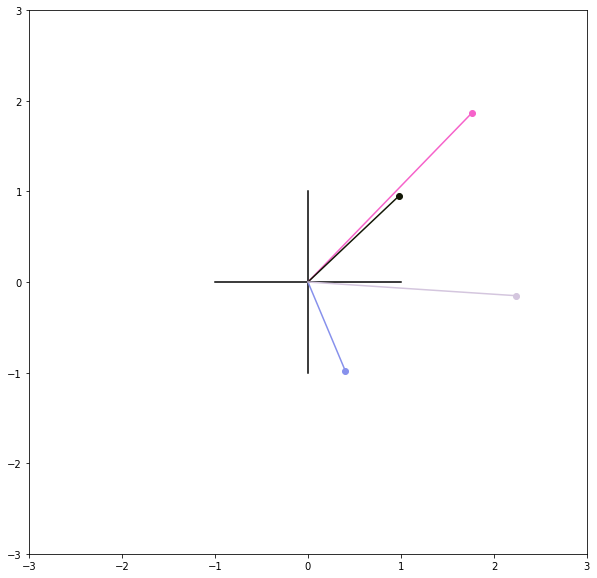

In [17]:
# Generate a random height-2 matrix and plot the columns using our function
matrix = np.random.normal(size=(2, 4))
print('Matrix:')
print(matrix)
plotVec2(matrix)

## Part (b)

In [25]:
# you mean angles are returned in degrees
# instead of using a function, you could multiply by 180 and divide by pi

In [18]:
import math

def vecLenAngle(v1, v2, verbose=False):
    """
    Angles are returned in radians. If one or more of the vectors has 
    zero length, 'N/A' is returned for the angle.
    """
    # The magnitude is the sqrt of the sum of component squares
    mag1 = np.sqrt(np.sum(np.square(v1)))
    mag2 = np.sqrt(np.sum(np.square(v2)))
    # Dot product = mag1*mag2*cos(theta), where theta is the angle between v1
    # and v2. So theta = arccos(dot/(mag1*mag2))
    dot = np.sum(np.multiply(v1, v2))
    if mag1*mag2 == 0:
        theta = 'N/A'
    else:
        theta = math.degrees(np.arccos(dot/(mag1*mag2)))
        
    if verbose:
        print('Magnitude of vector 1: %0.2f' % mag1)
        print('Magnitude of vector 2: %0.2f' % mag2)
        if type(theta) == str:
            print('Angle N/A')
        else:
            print('Angle: %0.1f degrees' % theta)
    
    return mag1, mag2, theta

In [19]:
# Generate two random vectors and use our function to compute
# the magnitudes & lengths
v1 = np.random.normal(size=(2,))
v2 = np.random.normal(size=(2,))
print('Vector 1:')
print(v1)
print('Vector 2:')
print(v2)
mag1, mag2, theta = vecLenAngle(v1, v2, verbose=True)

Vector 1:
[ 1.49407907 -0.20515826]
Vector 2:
[ 0.3130677  -0.85409574]
Magnitude of vector 1: 1.51
Magnitude of vector 2: 0.91
Angle: 62.1 degrees


## Part (c)

In [20]:
# generate a random matrix of size (2, 2)
matrix = np.random.normal(size=(2, 2))

In [21]:
# writing a wrapper for numpy's SVD because numpy returns singular values as an array (weird).
def svd(matrix):
    U, s, Vh = np.linalg.svd(matrix)
    S = np.zeros(matrix.shape, dtype=float)
    S[:len(s), :len(s)] = np.diag(s)
    return U, S, Vh

In [22]:
# decompose our matrix with SVD
U, S, Vh = svd(matrix)
# observe the contents
print('U: \n', U)
print('S: \n', S)
print('Vh: \n', Vh)

U: 
 [[-0.92837386  0.37164766]
 [ 0.37164766  0.92837386]]
S: 
 [[ 2.83242557  0.        ]
 [ 0.          0.46946623]]
Vh: 
 [[ 0.95020844 -0.31161501]
 [-0.31161501 -0.95020844]]


In [23]:
# define our standard basis vectors e1 and e2
e1 = np.array([1, 0])
e2 = np.array([0, 1])

In [24]:
# observe lengths and angle between e1 and e2
mag1, mag2, theta = vecLenAngle(e1, e2, verbose=True)

Magnitude of vector 1: 1.00
Magnitude of vector 2: 1.00
Angle: 90.0 degrees


In [54]:
# observe lengths and angle between Vhe1 and Vhe2
Vhe1 = np.matmul(Vh, e1)
Vhe2 = np.matmul(Vh, e2)
mag1, mag2, theta = vecLenAngle(Vhe1, Vhe2, verbose=True)

Magnitude of vector 1: 1.00
Magnitude of vector 2: 1.00
Angle: 90.0 degrees


In [55]:
# observe lengths and angle between SVhe1 and SVhe2
SVhe1 = np.matmul(S, Vhe1)
SVhe2 = np.matmul(S, Vhe2)
mag1, mag2, theta = vecLenAngle(SVhe1, SVhe2, verbose=True)

Magnitude of vector 1: 2.70
Magnitude of vector 2: 0.99
Angle: 150.1 degrees


In [56]:
# observe lengths and angle between USVhe1 and USVhe2
USVhe1 = np.matmul(U, SVhe1)
USVhe2 = np.matmul(U, SVhe2)
mag1, mag2, theta = vecLenAngle(USVhe1, USVhe2, verbose=True)

Magnitude of vector 1: 2.70
Magnitude of vector 2: 0.99
Angle: 150.1 degrees


The only time that the vector magnitudes and the angle between the two vectors changed was during the S transformation (SVhen). The other two transformations did not change the magnitudes or angle. This makes sense because the other two transformations involved orthogonal matrices, which perform either rotation or reflection.

In [57]:
def vecs_to_mat(vecs):
    """
    Helper function. Take a set of vectors and put them together into a 
    matrix, where each vector is one column of the matrix.
    """
    return np.hstack([vec.reshape(-1, 1) for vec in vecs])

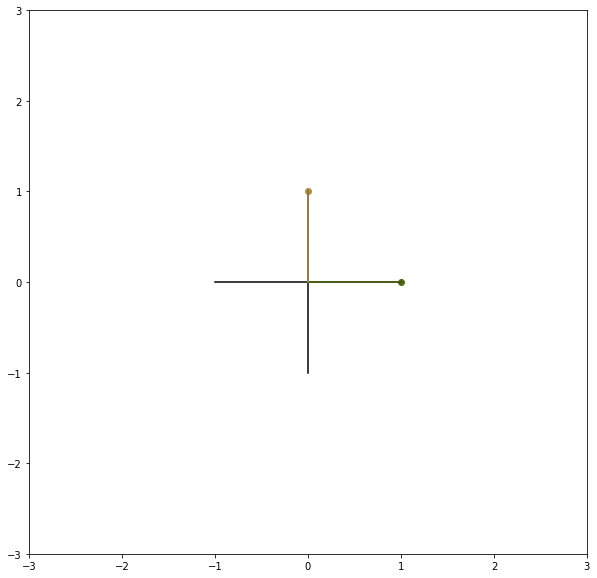

In [58]:
# first, plot e1 and e2
plotVec2(vecs_to_mat([e1, e2]))

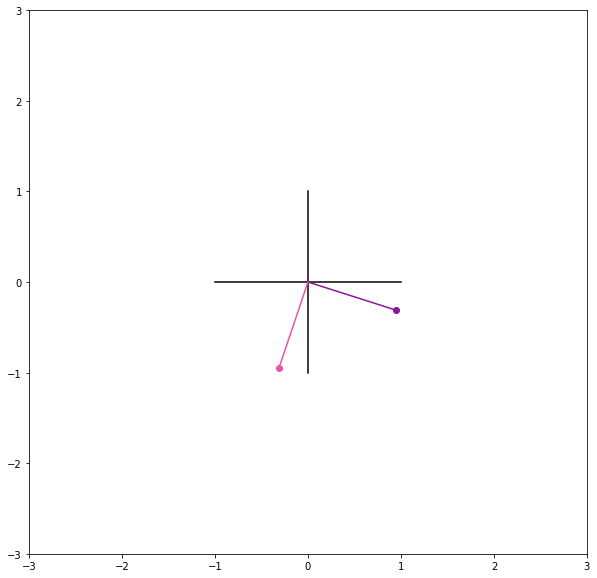

In [59]:
# next, plot Vhe1 and Vhe2. Notice that this is just a rotation
plotVec2(vecs_to_mat([Vhe1, Vhe2]))

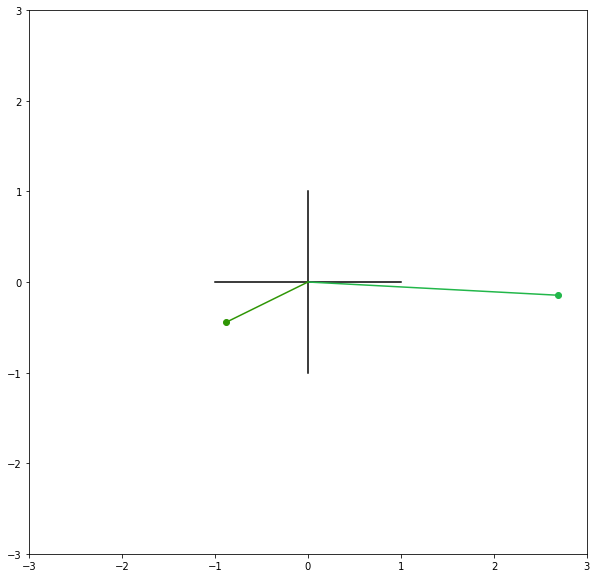

In [60]:
# next, plot SVhe1 and SVhe2. Here we actually change lengths and the angle.
plotVec2(vecs_to_mat([SVhe1, SVhe2]))

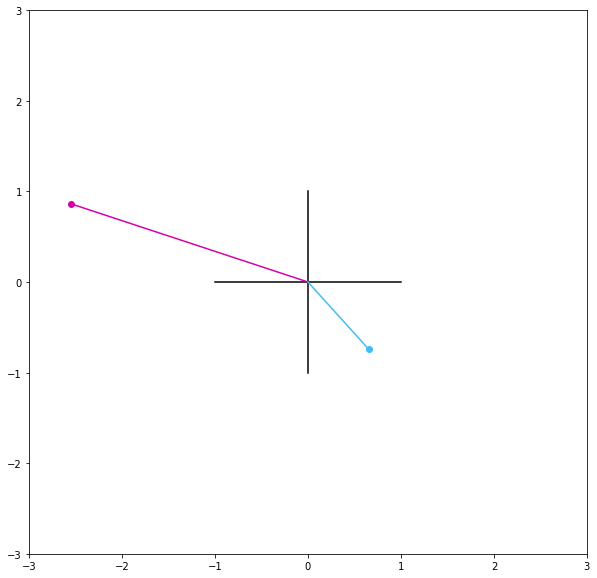

In [61]:
# next, plot USVhe1 and USVhe2. Notice that this is just a reflection/rotation.
plotVec2(vecs_to_mat([USVhe1, USVhe2]))

In [26]:
# nice colors

## part (d)

In [73]:
# create theta vector
thetas = np.array([2*np.pi*n/64 for n in range(65)])
# generate the matrix P
P = np.hstack([[[np.cos(theta)], [np.sin(theta)]] for theta in thetas])

In [82]:
def plot_points(P, boundary=3):
    """Function to plot the points w/ a single blue curve through them & a red star."""
    # First, plot the axes
    plt.figure(figsize=(10, 10))
    plt.plot([-1, 1], [0, 0], c='black')
    plt.plot([0, 0], [-1, 1], c='black')
    # Now, plot the points & circle
    plt.scatter(P[0], P[1], s=20, c='b')
    plt.plot(P[0], P[1], c='b')
    # Now the red star
    plt.scatter(P[0,0], P[1,0], s=400, c='r', marker='*')
    plt.ylim([-boundary, boundary])
    plt.xlim([-boundary, boundary])
    plt.show()

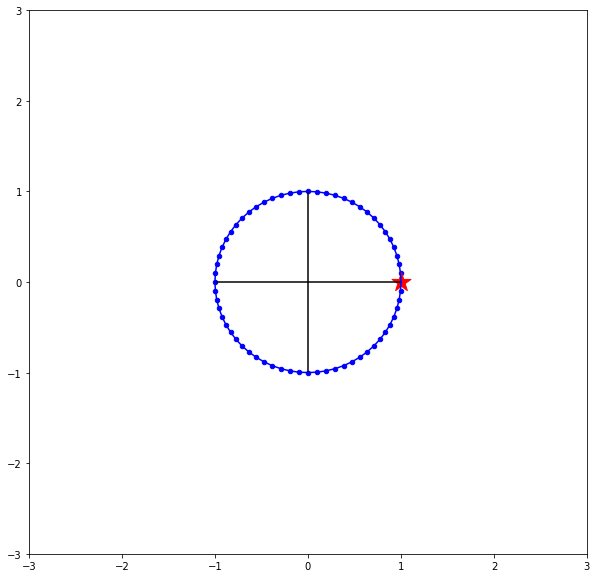

In [83]:
# plot initial points
plot_points(P, boundary=3)

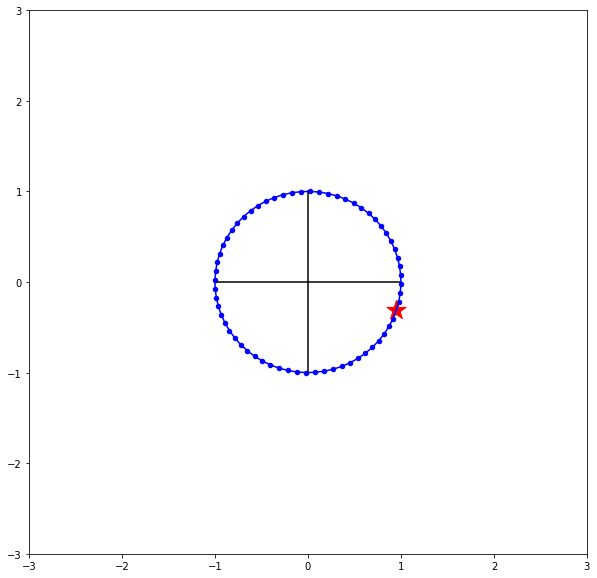

In [84]:
# this is a slight rotation
VhP = np.matmul(Vh, P)
plot_points(VhP, boundary=3)

Here we see a rotation of the points to the left. Recall that an orthogonal 
matrix transformation is a simple rotation operation.

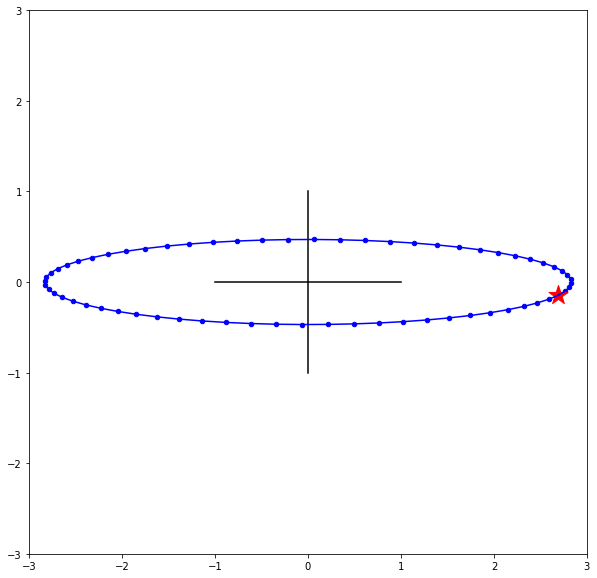

In [85]:
# Now vectors get scaled (different scale for each dimension)
SVhP = np.matmul(S, VhP)
plot_points(SVhP, boundary=3)

Here we see a scaling of the points. The x and y values of each point are scaled 
separately. This is what we expect from the singular value matrix transformation.

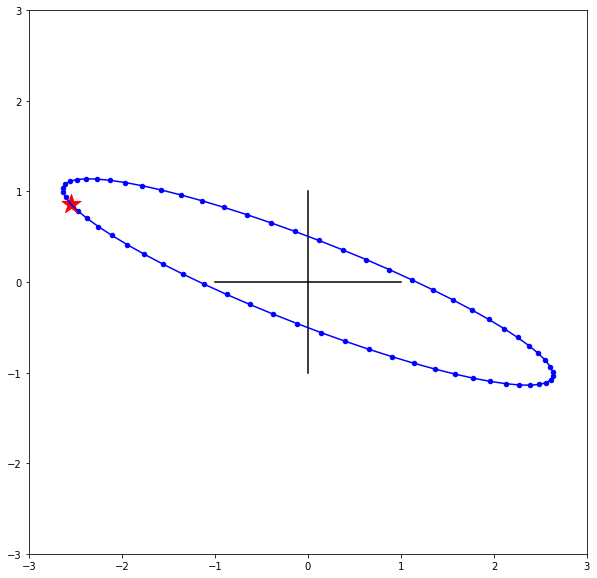

In [86]:
# now vectors get rotated
USVhP = np.matmul(U, SVhP)
plot_points(USVhP, boundary=3)

Here we see another simple reflection/rotation of the points, appropriate of an
orthogonal matrix transformation.

<span style="color:orange"> good 100/100 </span>

# Problem #3

## Part (a)

Given this weight vector 'w', the unit vector 'u' that would elicit the largest response is the one for which the the dot product u•w has a maximum value. Recalling from class, the dot product achieves a maximum when the two vectors in consideration are parallel, i.e., have the same direction. So we can find the optimal 'u' by choosing the unit vector in the direction of 'w', which is done by taking w and normalizing it:

In [3]:
# first write the weight vector w
w = np.asarray([1, 3, 4, 2, 1])
# now compute the unit vector that points in the direction of w
u = w / np.linalg.norm(w)
print('optimal unit vector: ', u)

optimal unit vector:  [ 0.1796053   0.53881591  0.71842121  0.3592106   0.1796053 ]


## Part (b)

In [87]:
# here is a non-unit vector that will work
v = np.asarray([-1, 0, 1, -1, -1])
# it will still work if we normalize it to become a unit vector
v_hat = v / np.linalg.norm(v)
# let's verify it
w = np.asarray([1, 3, 4, 2, 1])
assert(np.dot(v_hat, w) == 0)

In [88]:
v_hat

array([-0.5,  0. ,  0.5, -0.5, -0.5])

This is not a physically realizable stimulus, because it involves negative values. You cannot have a negative light intensity value. The only physicially realizable stimulus that could elicit a zero response in this neuron is the zero vector. The neuron would have to have some negative weight dimensions for any other stimulus to work.

<span style="color:orange"> good 100/100 -
you could automate the search for an orthogonal vector
</span>

# Problem #4

In [27]:
def gramSchmidt(N):
    # Let's keep a list of our vectors
    vecs = []
    # We're going to create N vectors. Each will follow the same set of operations.
    # Let's loop through.
    for i in range(N):
        # Generate random vector
        v = np.random.normal(size=(N,))
        # Go through all previously created basis vectors and subtract off the projection
        # of our current
        for v_p in vecs:
            v = v - np.dot(v, v_p)*v_p
        # normalize it so that it has length 1
        v = v / np.linalg.norm(v)
        # add it to our list
        vecs.append(v)
        
    return np.hstack([v.reshape(-1,1) for v in vecs])

In [28]:
# Lets test with N = 3
M_orth = gramSchmidt(3)

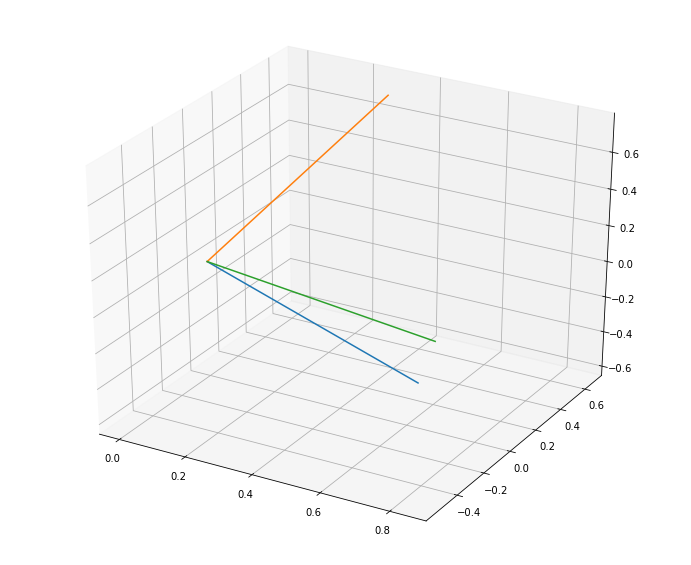

In [29]:
# Now let's plot our 3 basis vectors in a 3d plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
# plot our 3 basis vectors
for i in range(3):
    x, y, z = M_orth[:, i]
    ax.plot([0, x], [0, y], [0, z])
ax.autoscale_view(scalex=True, scaley=True, scalez=True)
plt.show()

As expected, we see 3 unit vectors that are all perpendicular to one another.

In [30]:
# Now let's generate an orthogonal matrix with N > 3 and verify it
M_orth4 = gramSchmidt(4)

In [31]:
def verify_orthogonal(matrix):
    """Use this function to verify that the matrix is orthogonal"""
    # it should be square
    assert matrix.shape[0] == matrix.shape[1]
    # loop through column/row indices...
    for i in range(matrix.shape[0]):
        col = matrix[:, i]
        row = matrix[i]
        # make sure the row and column vectors are all unit length
        # (allow for small precision errors)
        assert np.abs(np.linalg.norm(col) - 1.) < 1e-5
        assert np.abs(np.linalg.norm(row) - 1.) < 1e-5
        # go throw other rows and cols and make sure we are orthogonal to them all
        other_inds = list(range(matrix.shape[0]))
        other_inds.remove(i)
        for j in other_inds:
            # dot product test of orthogonality; dot product should be zero
            # (allow for small precision errors)
            assert np.abs(np.dot(col, matrix[:, j])) < 1e-5
            assert np.abs(np.dot(row, matrix[j])) < 1e-5
    print('Verified: matrix is orthogonal.')

In [32]:
# This passes - great success!
verify_orthogonal(M_orth4)

Verified: matrix is orthogonal.


<span style="color:orange"> good 100/100 - here's a quicker test <1e-10</span>

` np.sum(M.T.dot(M)-np.eye(N))<epsilon`


# Problem #5

In [33]:
# load the data file
import scipy.io as sio
data = sio.loadmat('./mtxExamples.mat')

In [34]:
# inspect it
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Sep 11 10:04:11 2017',
 '__version__': '1.0',
 'mtx1': array([[-0.58270902, -1.29931593, -0.11040614],
        [-1.67174677, -3.54875482, -5.08449222]]),
 'mtx2': array([[-2.10159657,  1.09455262,  0.54227098],
        [ 0.97597203, -0.50830533, -0.25182821],
        [-3.26218446,  1.6990095 ,  0.84173527]]),
 'mtx3': array([[  2.41396453,   2.81563905],
        [ -2.23106477, -13.0602928 ],
        [ -1.17314897, -10.30842011]]),
 'mtx4': array([[-0.83115196,  1.92170834,  0.47634232],
        [ 0.01513876, -0.03500235, -0.00867619]])}

## mtx1

In [35]:
# using our function 'svd' from problem #2, decompose mtx1
U1, S1, Vh1 = svd(data['mtx1'])
# observe the contents
print('U: \n', U1)
print('S: \n', S1)
print('Vh: \n', Vh1)

U: 
 [[-0.15135516 -0.98847945]
 [-0.98847945  0.15135516]]
S: 
 [[ 6.49473627  0.          0.        ]
 [ 0.          1.04824667  0.        ]]
Vh: 
 [[ 0.26801448  0.5703895   0.77641745]
 [ 0.30810342  0.71283291 -0.63003296]
 [-0.91282009  0.40807483  0.01531058]]


### (a)
For this matrix, the two singular values are nonzero. However, we have one less singular value than we have row vectors in Vh. Thus, the information projected onto the 3rd dimension of Vh is thrown away. So the nullspace is the space spanned by the row vector v3.

In [36]:
def generate_null_mtx1():
    """Function to generate a vector from the nullspace of mtx1."""
    # The space spanned by a single vector is simply the space of all
    # vectors parallel to that vector, i.e. all vectors that are a scalar
    # multiple.
    v3 = Vh1[2]
    # generate a random scale
    a = np.random.randn()
    
    return a*v3

In [37]:
# Generate a random example vector from nullspace
vec = generate_null_mtx1()
# Test that our matrix maps it to zero (allow for small precision error)
print('result of projection: ', np.matmul(data['mtx1'], vec))

result of projection:  [  7.15573434e-18  -3.08780779e-16]


So we see that this gets mapped to the zero vector (with small precision error)

### (b)

We have two non-zero singular values and two column vectors in our U matrix. Therefore the rangespace of this
matrix transformation is the space spanned by the two column vectors in U.

In [38]:
def generate_range_mtx1():
    """Function to generate a vector from the rangespace of mtx1."""
    # first write the two column vectors of U
    u1 = U1[:, 0]
    u2 = U1[:, 1]
    # The space spanned by these vectors is the space of all
    # vectors a*u1 + b*u2, where 'a' and 'b' are scalars. So
    # we can generate a random vector from this space by generating
    # two random scalars and combining.
    a, b = np.random.normal(size=(2,))
    
    return a*u1 + b*u2

In [39]:
# Here we will generate a vector from the rangespace of mtx1
y = generate_range_mtx1()
print('y: ', y)

y:  [-0.24691168  0.94370998]


In [40]:
# So we have M and we have y. Let's solve for x in Mx = y
# using the least squares approach:
x, _, _, _ = np.linalg.lstsq(data['mtx1'], y)
print('x: ', x)
print('Mx: ', np.matmul(data['mtx1'], x))

x:  [ 0.07676671  0.18446012 -0.33959108]
Mx:  [-0.24691168  0.94370998]


So we see that there exists a vector x such that Mx = y.

<span style="color:orange"> ok, so here you are using a scipy function. It's great that you know how to use this tool, but in the context of these homeworks, we would like you to stick to the method taught in class. Here you would use the SVD to invert what can be inverted, indeed both orthogonal and diagonal matrices can be easily inverted <1e-10</span>


## mtx2

In [41]:
# decompose mtx2
U2, S2, Vh2 = svd(data['mtx2'])
# observe the contents
print('U: \n', U2)
print('S: \n', S2)
print('Vh: \n', Vh2)

U: 
 [[-0.52521737 -0.81526396  0.24390859]
 [ 0.24390859  0.13037478  0.9609948 ]
 [-0.81526396  0.56422256  0.13037478]]
S: 
 [[  4.62818793e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.14632510e-16   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]
Vh: 
 [[ 0.86456826 -0.45028407 -0.22308291]
 [ 0.50251088  0.77281639  0.38760501]
 [-0.00213023 -0.44721258  0.89442516]]


### (a)

For this matrix, the second and third singular values are zero (with small precision error). Thus, the information projected onto the 2nd and 3rd dimensions of Vh is thrown away. So the nullspace is the space spanned by the 2nd and 3rd row vectors of Vh.

In [42]:
def generate_null_mtx2():
    """Function to generate a vector from the nullspace of mtx2."""
    # first write the 2nd and 3rd row vectors of  V
    v2 = Vh2[1]
    v3 = Vh2[2]
    # Now, following earlier logic, generate a random linear
    # combination a*v2 + b*v3
    a, b = np.random.normal(size=(2,))
    
    return a*v2 + b*v3

In [43]:
# Generate a random example vector from nullspace
vec = generate_null_mtx2()
# Test that our matrix maps it to zero (allow for small precision error)
print('result of projection: ', np.matmul(data['mtx2'], vec))

result of projection:  [ -1.11022302e-16   5.55111512e-17  -2.22044605e-16]


So we see that this gets mapped to the zero vector (with small precision error)

### (b)

We have one non-zero singular value in our S matrix. Therefore the rangespace of this
matrix transformation is the space spanned by the first column vector in U.

In [44]:
def generate_range_mtx2():
    """Function to generate a vector from the rangespace of mtx2."""
    # first write the first column vector of U
    u1 = U2[:, 0]
    # Now, following earlier logic:
    a = np.random.randn()
    
    return a*u1

In [45]:
# Here we will generate a vector from the rangespace of mtx2
y = generate_range_mtx2()
print('y: ', y)

y:  [ 0.0148018  -0.00687389  0.02297595]


In [46]:
# So we have M and we have y. Let's solve for x in Mx = y
# using the least squares approach:
x, _, _, _ = np.linalg.lstsq(data['mtx2'], y)
print('x: ', x)
print('Mx: ', np.matmul(data['mtx2'], x))

x:  [-0.00526458  0.0027419   0.00135841]
Mx:  [ 0.0148018  -0.00687389  0.02297595]


So we see that there exists a vector x such that Mx = y.

## mtx3

In [47]:
# decompose mtx3
U3, S3, Vh3 = svd(data['mtx3'])
# observe the contents
print('U: \n', U3)
print('S: \n', S3)
print('Vh: \n', Vh3)

U: 
 [[ 0.18592009  0.95640618 -0.2252131 ]
 [-0.77407287  0.00139524 -0.63309497]
 [-0.60518171  0.29203643  0.74058748]]
S: 
 [[ 17.11658798   0.        ]
 [  0.           1.99152349]
 [  0.           0.        ]]
Vh: 
 [[ 0.16859549  0.98568533]
 [ 0.98568533 -0.16859549]]


### (a)

For this matrix, the two singular values are non-zero, and we have two row vectors in Vh. Thus, the nullspace for this matrix is empty.

### (b)

We have two non-zero singular values (s1 and s2). Therefore, the two corresponding column vectors of U span the range space of this matrix. 

In [48]:
def generate_range_mtx3():
    """Function to generate a vector from the rangespace of mtx3."""
    # first write the two column vectors of U
    u1 = U3[:, 0]
    u2 = U3[:, 1]
    # As we've done before...
    a, b = np.random.normal(size=(2,))
    
    return a*u1 + b*u2

In [49]:
# Here we will generate a vector from the rangespace of mtx3
y = generate_range_mtx3()
print('y: ', y)

y:  [ 0.14325298 -0.33146727 -0.23979316]


In [50]:
# So we have M and we have y. Let's solve for x in Mx = y
# using the least squares approach:
x, _, _, _ = np.linalg.lstsq(data['mtx3'], y)
print('x: ', x)
print('Mx: ', np.matmul(data['mtx3'], x))

x:  [ 0.03714105  0.01903504]
Mx:  [ 0.14325298 -0.33146727 -0.23979316]


So we see that there exists a vector x such that Mx = y.

## mtx4

In [51]:
# decompose mtx4
U4, S4, Vh4 = svd(data['mtx4'])
# observe the contents
print('U: \n', U4)
print('S: \n', S4)
print('Vh: \n', Vh4)

U: 
 [[-0.99983416  0.01821117]
 [ 0.01821117  0.99983416]]
S: 
 [[ 2.14760522  0.          0.        ]
 [ 0.          0.          0.        ]]
Vh: 
 [[ 0.38707758 -0.89496294 -0.22183841]
 [ 0.89496294  0.42255669 -0.14313342]
 [ 0.22183841 -0.14313342  0.96452089]]


### (a)

For this matrix we have only one non-zero singular value, but 3 row vectors in Vh. Thus the nullspace is the space spanned by the 2nd and 3rd row vectors in Vh

In [52]:
def generate_null_mtx4():
    """Function to generate a vector from the nullspace of mtx4."""
    # first write the 2nd and 3rd row vectors of  V
    v2 = Vh4[1] 
    v3 = Vh4[2]
    # Now, following earlier logic, generate a random linear
    # combination a*v2 + b*v3
    a, b = np.random.normal(size=(2,))
    
    return a*v2 + b*v3

In [53]:
# Generate a random example vector from nullspace
vec = generate_null_mtx4()
# Test that our matrix maps it to zero (allow for small precision error)
print('result of projection: ', np.matmul(data['mtx4'], vec))

result of projection:  [  0.00000000e+00   8.67361738e-19]


So we see that this gets mapped to the zero vector (with small precision error)

### (b)

We have one non-zero singular value, so the rangespace is the space spanned by the first column vector in U

In [54]:
def generate_range_mtx4():
    """Function to generate a vector from the rangespace of mtx4."""
    # first write the first column vector of U
    u1 = U4[:, 0]
    # Now, following earlier logic:
    a = np.random.randn()
    
    return a*u1

In [55]:
# Here we will generate a vector from the rangespace of mtx4
y = generate_range_mtx4()
print('y: ', y)

y:  [ 0.36268101 -0.00660594]


In [56]:
# So we have M and we have y. Let's solve for x in Mx = y
# using the least squares approach:
x, _, _, _ = np.linalg.lstsq(data['mtx4'], y)
print('x: ', x)
print('Mx: ', np.matmul(data['mtx4'], x))

x:  [-0.06537932  0.15116368  0.03746961]
Mx:  [ 0.36268101 -0.00660594]


So we see that there exists a vector x such that Mx = y.

<span style="color:orange"> 80/100 - please don't use inbuilt functions if simpler tools taught in class do the job and give you an opportunity to demonstrate your understanding of the material</span>


<span style="color:orange"> good job overall, nicely explained <1e-10</span>
